<a href="https://colab.research.google.com/github/VozSoldat/PCVK-Ganjil-2025/blob/main/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Praktikum

## Praktikum D1 - Operasi citra sederhana

### Akses folder images pada Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Melakukan transformasi linier brightness

Mengubah tingkat kecerahan citra
--------------------------------
Masukkan nilai kecerahan: 5


/tmp/ipython-input-1387362322.py:27: RuntimeWarning: overflow encountered in scalar add
  brightness_image[y, x, c] = np.clip(original[y,x,c] + brightness, 0, 255)


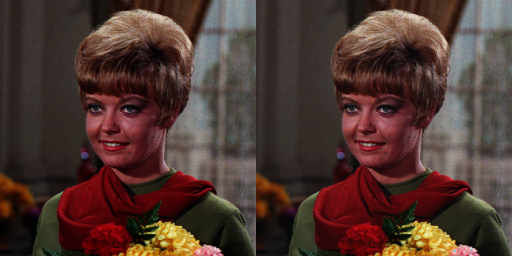

In [2]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

# original = cv.imread('/content/drive/MyDrive/PCVK/female.tiff')
original = cv.imread('/content/drive/MyDrive/PCVK/female.tiff') # Use the path from Google Drive

print('Mengubah tingkat kecerahan citra')
print('--------------------------------')

try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

if original is None: # Add a check if the image is loaded
  print("Error: Could not load image.")
  print("Please ensure the file path '/content/drive/MyDrive/PCVK/female.tiff' is correct and the file exists.")
else:
  brightness_image = np.zeros(original.shape, original.dtype)

  # akses per pixel

  for y in range(original.shape[0]):
    for x in range(original.shape[1]):
      for c in range(original.shape[2]):
        brightness_image[y, x, c] = np.clip(original[y,x,c] + brightness, 0, 255)

  # cara simpel tanpa loop
  # brightness_image = cv.convertScaleAbs(original, beta=brightness)

  final_frame = cv.hconcat([original, brightness_image])
  cv2_imshow(final_frame)

### Tugas praktikum D1

1. Implementasikan inverse citra pada Google Colaboratory menggunakanformulayang terdapat pada bagian Ulasan Teori, sehingga menghasilkan keluaranseperti
berikut:

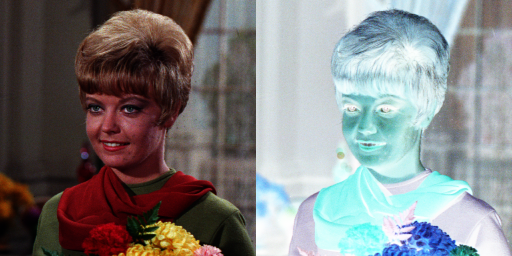

In [3]:
inverted_image = np.zeros(original.shape, original.dtype)


# akses per pixel

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      # brightness_image[y, x, c] = np.clip(original[y,x,c] + brightness, 0, 255)
      inverted_image[y, x, c] = 255 - original[y,x,c]

final_frame = cv.hconcat([original, inverted_image])
cv2_imshow(final_frame)

2. Implementasikan transformasi contrast pada Google Colaboratory menggunakanformula yang terdapat pada bagian Ulasan Teori untuk kontras, sehinggamenghasilkan keluaran seperti berikut:

Mengubah kontras dan tingkat kecerahan citra
--------------------------------
Masukkan nilai kecerahan [-355 - 255] : 5
Masukkan nilai kontras [1.0 - 3.0] : 5


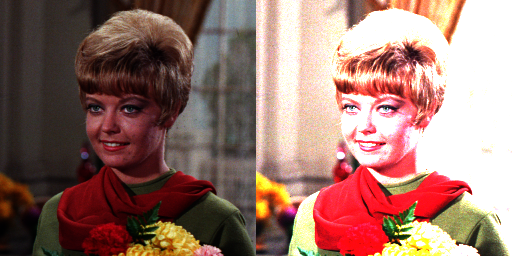

In [4]:
print('Mengubah kontras dan tingkat kecerahan citra')
print('--------------------------------')

try:
  brightness = int(input('Masukkan nilai kecerahan [-355 - 255] : '))
  contrast = float(input('Masukkan nilai kontras [1.0 - 3.0] : '))
  # contrast = 50
except ValueError:
  print('Error, not a number')



# def brighten (_image):
#   image = np.zeros(_image.shape, _image.dtype)
#   for y in range(_image.shape[0]):
#     for x in range(_image.shape[1]):
#       for c in range(_image.shape[2]):
#         # brightness_image[y, x, c] = np.clip(original[y,x,c] + brightness, 0, 255)
#         image [y,x,c]= np.clip(_image[y,x,c] + brightness, 0, 255)

#   return image


import numpy as np

def adjust_contrast_brightness_iterative(_image, contrast=1.0, brightness=0):
    image = np.zeros(_image.shape, _image.dtype)
    for y in range(_image.shape[0]):
      for x in range(_image.shape[1]):
        for c in range(_image.shape[2]):
          image [y,x,c]= np.clip(contrast * _image[y,x,c] + brightness, 0, 255)
    return image


final_frame = cv.hconcat([original, adjust_contrast_brightness_iterative(original, contrast, brightness)])
cv2_imshow(final_frame)

3. Implementasikan transformasi logarithmic brightness pada Google Colaboratorymenggunakan formula yang terdapat pada bagian Ulasan Teori untuk transformasi
log, sehingga menghasilkan keluaran seperti berikut:

Mengubah tingkat kecerahan citra
--------------------------------


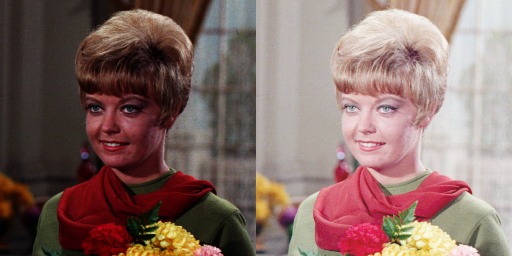

In [5]:
print('Mengubah tingkat kecerahan citra')
print('--------------------------------')

# try:
#   brightness = int(input('Masukkan nilai kecerahan [-355 - 255] : '))
# except ValueError:
#   print('Error, not a number')


def adjust_contrast_brightness_log(_image):
    h, w, c = _image.shape
    img_float = _image.astype(np.float32)

    c_scale = 255 / np.log(1 + np.max(img_float))

    log_image = np.zeros((h, w, c), dtype=np.uint8)

    for y in range(h):
        for x in range(w):
            for ch in range(c):
                r = img_float[y, x, ch]
                s = c_scale * np.log(1 + r)
                log_image[y, x, ch] = np.clip(s, 0, 255)

    return log_image

final_frame = cv.hconcat([original, adjust_contrast_brightness_log(original)])
cv2_imshow(final_frame)

4. Implementasikan transformasi grayscale menggunakan metode averaging, lightness, dan luminance pada Google Colaboratory menggunakan formula yang terdapat padabagian Ulasan Teori, sehingga menghasilkan keluaran seperti berikut:

In [6]:
image = cv.imread('/content/drive/MyDrive/PCVK/KTP7.jpeg')
# image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
# cv2_imshow(image)

a. Averaging

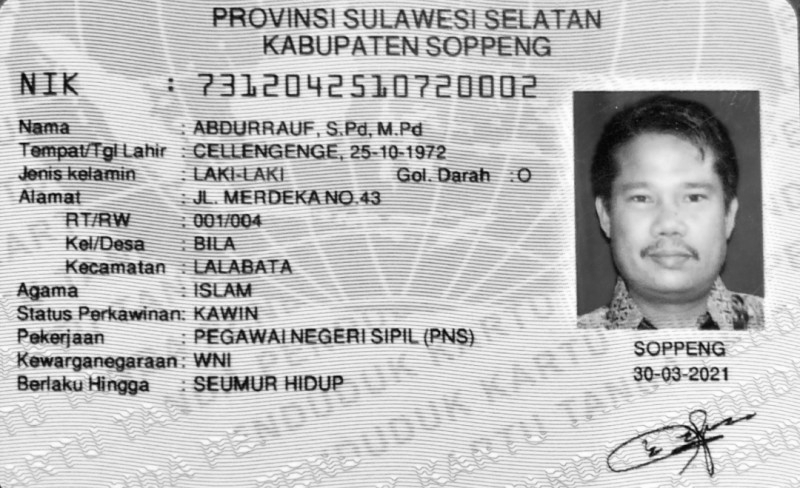

In [7]:
def grayscale_averaging(_image):
  r, g, b = cv.split(_image)
  grayscale_image = (r + g + b) / 3
  grayscale_image = grayscale_image.astype(np.uint8)
  return grayscale_image

def rgb_to_gray_average(image):
    h, w, c = image.shape
    gray = np.zeros((h, w), dtype=np.uint8)

    for y in range(h):
        for x in range(w):
            r, g, b = image[y, x]
            gray[y, x] = (int(r) + int(g) + int(b)) // 3

    return gray

# final_frame = cv.hconcat([image, grayscale_averaging(image)])
# cv2_imshow(grayscale_averaging(image))
cv2_imshow(rgb_to_gray_average(image))


b. Lightness

/tmp/ipython-input-2460876887.py:8: RuntimeWarning: overflow encountered in scalar add
  gray[y, x] = (max(r, g, b) + min(r,g,b)) // 2


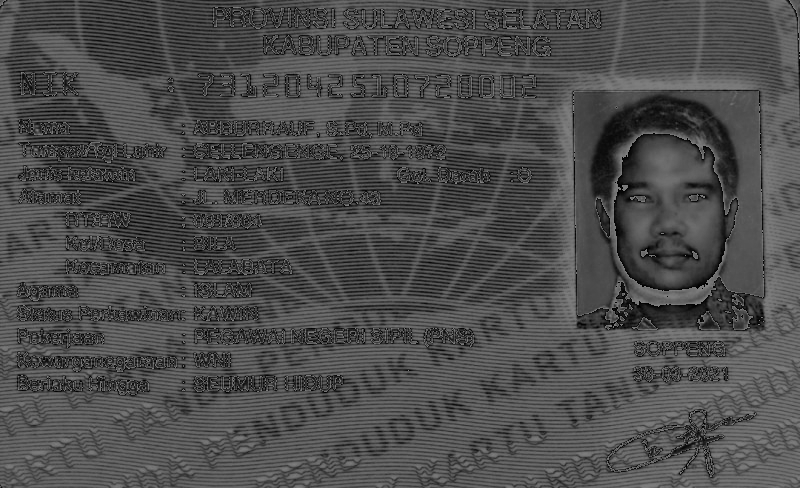

In [8]:
def rgb_to_gray_lightness(image):
    h, w, c = image.shape
    gray = np.zeros((h, w), dtype=np.uint8)

    for y in range(h):
        for x in range(w):
            r, g, b = image[y, x]
            gray[y, x] = (max(r, g, b) + min(r,g,b)) // 2

    return gray



# final_frame = cv.hconcat([image, grayscale_averaging(image)])
# cv2_imshow(grayscale_averaging(image))
cv2_imshow(rgb_to_gray_lightness(image))

c. Luminance

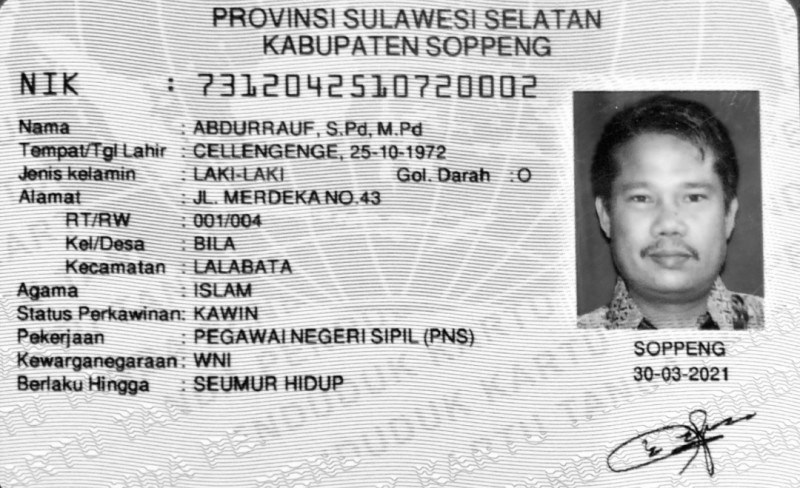

In [9]:
def rgb_to_gray_luminance(image):
    h, w, c = image.shape
    gray = np.zeros((h, w), dtype=np.uint8)

    for y in range(h):
        for x in range(w):
            r, g, b = image[y, x]
            gray[y, x] = 0.21 * r + 0.72 * g + 0.07 * b

    return gray

cv2_imshow(rgb_to_gray_luminance(image))

5. Tampilkanlah warna tertentu pada citra, dan ubah warna lain menjadi grayscale. Misal, tampilkan warna biru pada citra masukan dan ubah bagian lain yangtidakberwarna biru menjadi grayscale seperti pada contoh berikut:

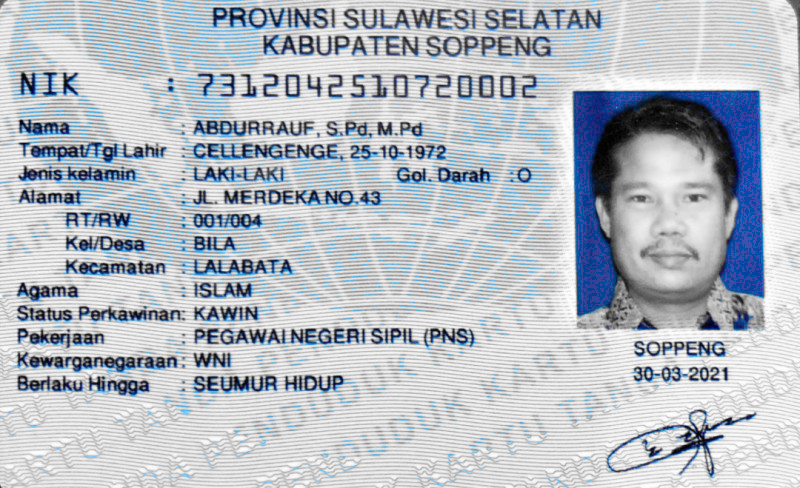

In [10]:
def keep_blue_only(image):
    hsv = cv.cvtColor(image, cv.COLOR_BGR2HSV)

    lower_blue = np.array([100, 100, 50])
    upper_blue = np.array([140, 255, 255])

    mask = cv.inRange(hsv, lower_blue, upper_blue)

    blue_only = cv.bitwise_and(image, image, mask=mask)

    gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    gray_bgr = cv.cvtColor(gray, cv.COLOR_GRAY2BGR)

    result = np.where(blue_only != 0, image, gray_bgr)

    return result

cv2_imshow(keep_blue_only(image))

## Praktikum D2

### 1. Buat Gamma Correction sesuai dengan petunjuk berikut


 Gamma Correction pada Citra
------------------------------
Masukkan nilai Gamma: 5


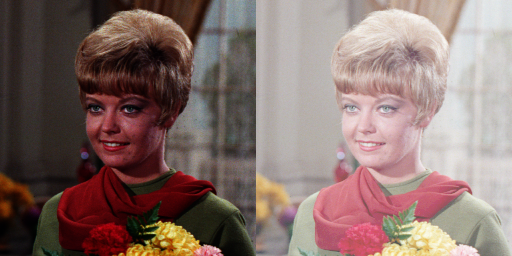

In [11]:
print(" Gamma Correction pada Citra")
print('------------------------------')

image = cv.imread('/content/drive/MyDrive/PCVK/female.tiff')

try:
  gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
  print('Error, not a number')

def gamma_correction(image, gamma):
  invGamma = 1 / gamma
  table = [((i / 255) ** invGamma) * 255 for i in range(256)]
  return cv.LUT(image, np.array(table, np.uint8))

final_frame = cv.hconcat([image, gamma_correction(image, gamma)])

cv2_imshow(final_frame)

### 2. Buat Simulasi Image Depth

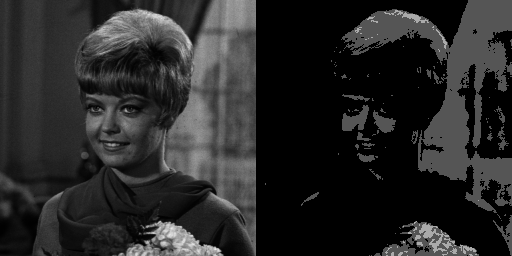

In [12]:
bit_depth = 2
level = 255 / (pow(2, bit_depth)-1)

original = cv.imread('/content/drive/MyDrive/PCVK/female.tiff', cv.IMREAD_GRAYSCALE)

def simulasi_depth(image, depth):
  result = (image // level) * level
  return result.astype(np.uint8)

final_frame = cv.hconcat([original, simulasi_depth(original, bit_depth)])
cv2_imshow(final_frame)

### 3. Buat modul Average Denoising

Rata rata:  27.860547958639128


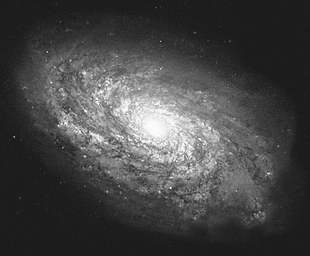

In [13]:
import glob

cv_img = []

# ambil data
for img in glob.glob('/content/drive/MyDrive/PCVK/Noises/*.jpg'):
  n = cv.imread(img, cv.IMREAD_GRAYSCALE)
  cv_img.append(n)

# data asli
original = cv.imread('/content/drive/MyDrive/PCVK/galaxy.jpg', cv.IMREAD_GRAYSCALE)

def psnr(original, compared):
    mse = np.mean((original - compared) ** 2)
    if mse == 0:
        return float('inf')
    max_pixel = 255.0
    return 10 * np.log10((max_pixel ** 2) / mse)

psnr_values = []

for img in cv_img:
  psnr_values.append(psnr(original, img))

mean_psnr = np.mean(psnr_values)
print("Rata rata: ",mean_psnr)

def image_average(images):
  _image = np.zeros(images[0].shape, np.float32)
  for img in images:
    _image += img.astype(np.float32)
  result = _image / len(images)
  return result.astype(np.uint8)

def image_average_length(images, length):
  length = min(length, len(images))
  _image = np.zeros(images[0].shape, np.float32)
  for i in range(length):
    _image += images[i].astype(np.float32)
  result = _image / len(images)
  return result.astype(np.uint8)

cv2_imshow(image_average_length(cv_img,99999999))

### 4. Buat image masking

#### Buat dua gambar operand

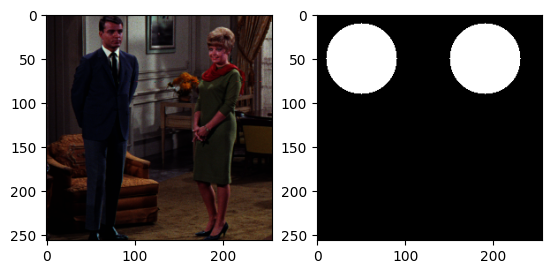

In [44]:
from matplotlib import pyplot as plt

left_img = cv.imread('/content/drive/MyDrive/PCVK/couple.tiff', cv.IMREAD_COLOR_RGB)

right_img = np.zeros(left_img.shape, left_img.dtype)

right_img = cv.circle(right_img, (50,50), 40, (255,255,255), -1)
right_img = cv.circle(right_img, (190,50), 40, (255,255,255), -1)



plt.subplot(121)
plt.imshow(left_img)
plt.subplot(122)
plt.imshow(right_img)
plt.show()

#### NOT operation

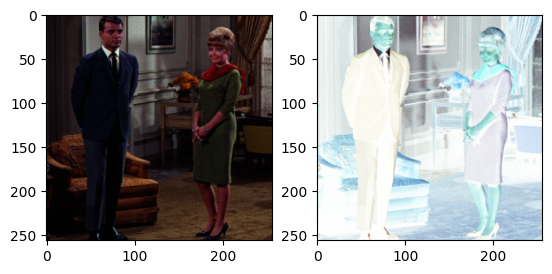

In [38]:
def not_operation(image_1):
  result = np.zeros_like(image_1, dtype=np.uint8)

  for i in range(image_1.shape[0]):
      for j in range(image_1.shape[1]):
          result[i, j] = 255 - image_1[i, j]

  return result

img_not = not_operation(left_img)


plt.subplot(121)
plt.imshow(left_img)
plt.subplot(122)
plt.imshow(img_not)
plt.show()

#### OR operation

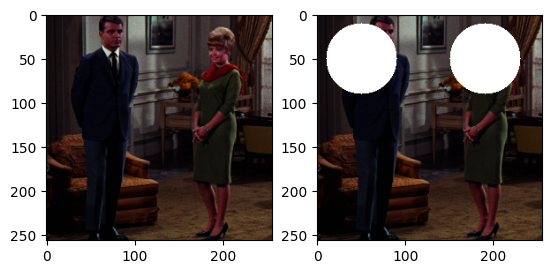

In [45]:
def or_operation(image_1, image_2):
  result = np.zeros_like(image_1, dtype=np.uint8)

  for i in range(image_1.shape[0]):
      for j in range(image_1.shape[1]):
          result[i, j] = image_1[i,j] | image_2[i,j]

  return result

img_or = or_operation(left_img, right_img)


plt.subplot(121)
plt.imshow(left_img)
plt.subplot(122)
plt.imshow(img_or)
plt.show()

#### AND operation

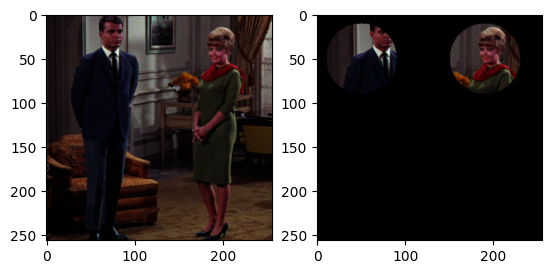

In [46]:
def and_operation(image_1, image_2):
  result = np.zeros_like(image_1, dtype=np.uint8)

  for i in range(image_1.shape[0]):
      for j in range(image_1.shape[1]):
          result[i, j] = image_1[i,j] & image_2[i,j]

  return result

img_and = and_operation(left_img, right_img)


plt.subplot(121)
plt.imshow(left_img)
plt.subplot(122)
plt.imshow(img_and)
plt.show()

#### NAND operation

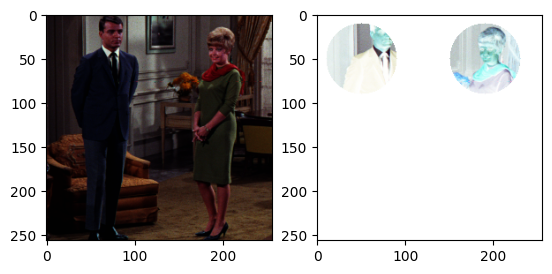

In [52]:
def nand_operation(image_1, image_2):
  result = np.zeros_like(image_1, dtype=np.uint8)

  for i in range(image_1.shape[0]):
      for j in range(image_1.shape[1]):
          result[i, j] = ~(image_1[i,j] & image_2[i,j])

  return result

img_nand = nand_operation(left_img, right_img)


plt.subplot(121)
plt.imshow(left_img)
plt.subplot(122)
plt.imshow(img_nand)
plt.show()

#### XOR operation

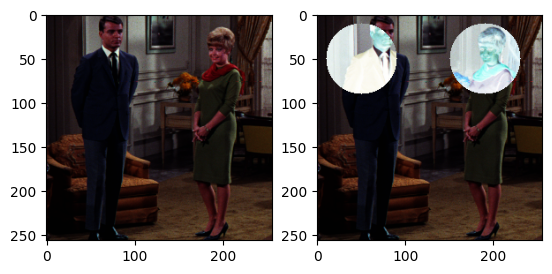

In [53]:
def xor_operation(image_1, image_2):
  result = np.zeros_like(image_1, dtype=np.uint8)

  for i in range(image_1.shape[0]):
      for j in range(image_1.shape[1]):
          result[i, j] = (image_1[i,j] ^ image_2[i,j])

  return result

img_xor = xor_operation(left_img, right_img)


plt.subplot(121)
plt.imshow(left_img)
plt.subplot(122)
plt.imshow(img_xor)
plt.show()